# Image Compression with Fast Fourier Transform (FFT)


## Import libraries



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from skimage import io
from matplotlib.image import imread
from mpl_toolkits.mplot3d import axes3d

plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams.update({'font.size': 16})



## Read the image

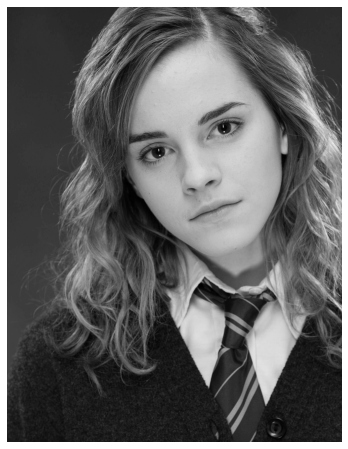

In [2]:
url = 'https://media.harrypotterfanzone.com/hermione-granger-order-of-the-phoenix-portrait-7.jpg'

A = io.imread(url)    # read the .jpg file into an numpy array
B = np.mean(A, -1)    # Convert RGB to grayscale

img = plt.imshow(B, cmap='gray')
plt.axis('off')
plt.show()

In [3]:
B.shape

(1952, 1500)

## Compute the FFT of the image

In Python, FFT is easily computed using the Numpy library.

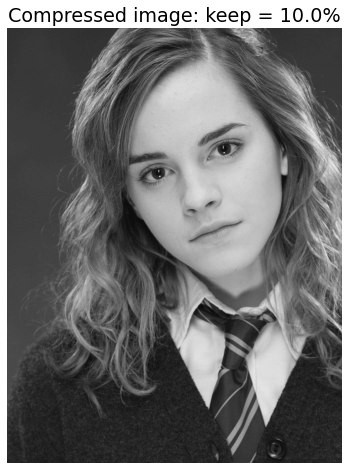

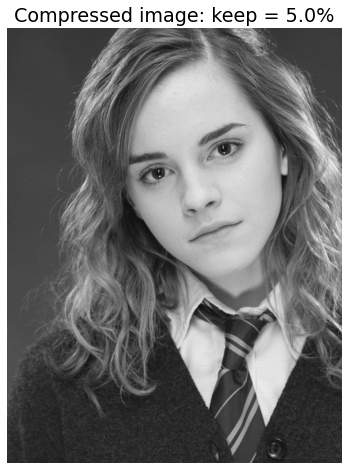

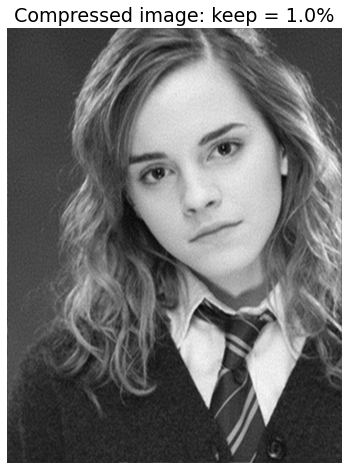

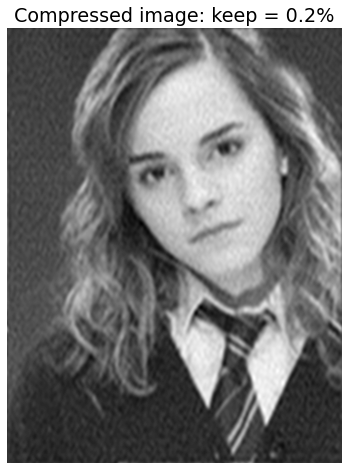

In [4]:
Bt = np.fft.fft2(B)

Btsort = np.sort(np.abs(Bt.reshape(-1)))  # sort the Fourier coefficients by magnitude 

# Truncate the small coefficients and inverse transform
for keep in (0.1, 0.05, 0.01, 0.002):
    thresh = Btsort[int(np.floor((1-keep)*len(Btsort)))]  # threshold
    ind = np.abs(Bt) > thresh   # Boolean mask
    Btlow = ind * Bt            # Threshold small coefficients
    Alow = np.fft.ifft2(Btlow).real  # Compressed image
    
    plt.figure()
    plt.imshow(Alow, cmap='gray')
    plt.axis('off')
    plt.title('Compressed image: keep = ' + str(keep*100) + '%')
    plt.show()


<IPython.core.display.Javascript object>


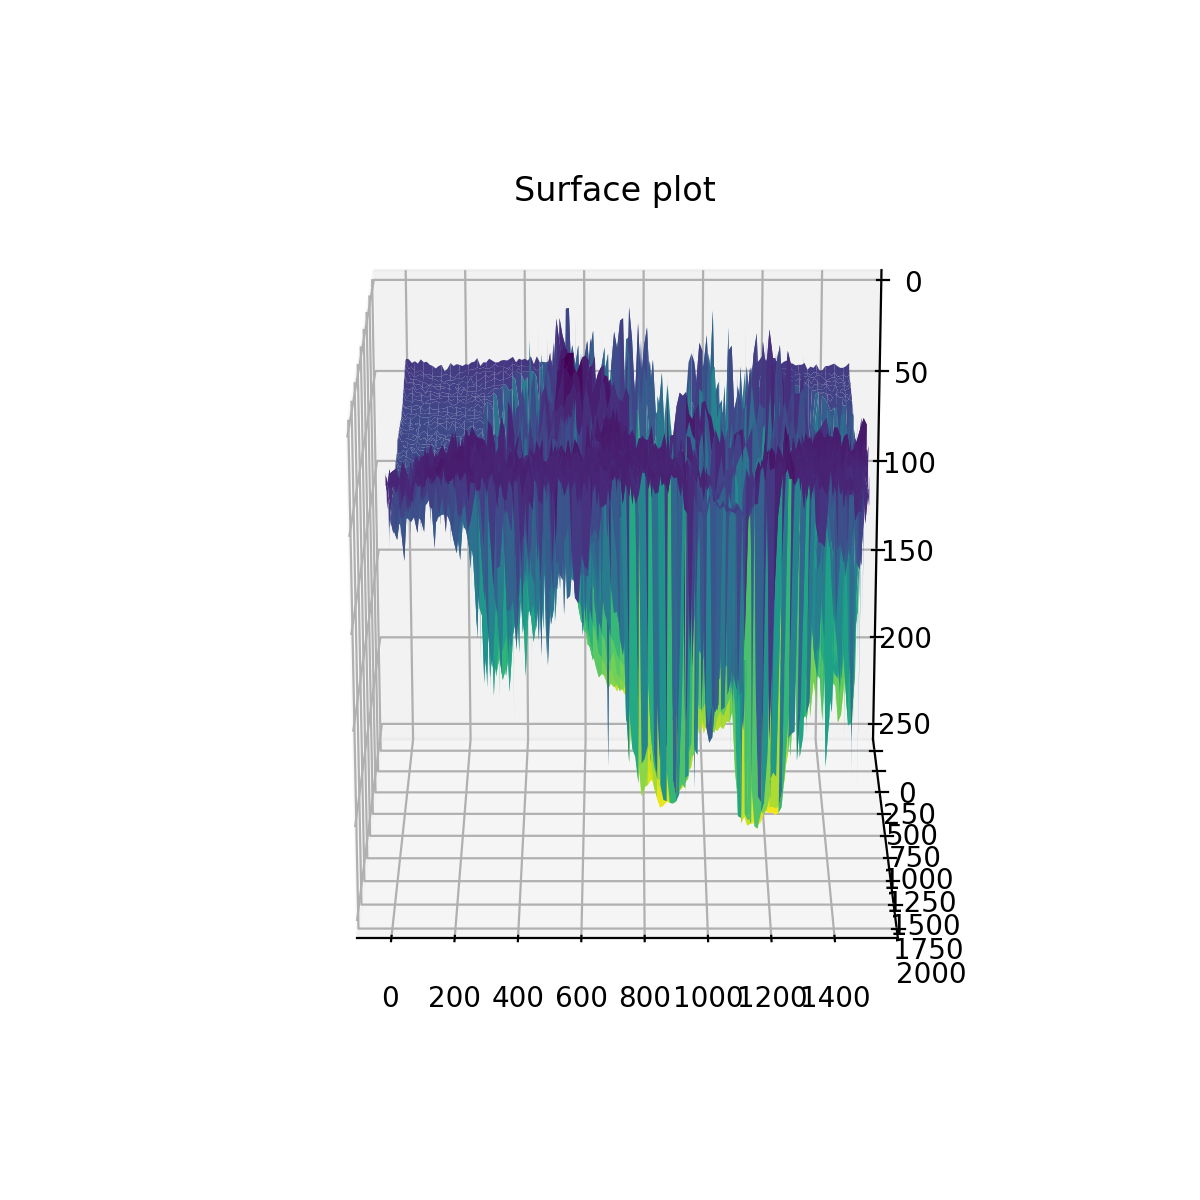

In [6]:
%matplotlib notebook
plt.rcParams['figure.figsize'] = [6, 6]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(np.arange(1, np.shape(B)[1]+1), np.arange(1,np.shape(B)[0]+1))
ax.plot_surface(X[0::10,0::10], Y[0::10,0::10],B[0::10,0::10],cmap='viridis',edgecolor='none')
ax.set_title('Surface plot')
ax.mouse_init()
ax.view_init(200,270)
plt.show()